In [1]:
import os

if os.path.realpath(".").split(os.path.sep)[-1] != "Quant-Finance":
    os.chdir("..")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import quant as qt

In [32]:
qt.plot.set_plot_options()

In [10]:
schemes = qt.api.mf_list(filter=["Nifty", "50", "UTI|Navi", "Direct", "Growth"])
schemes

,schemeCode,schemeName
19371,120716,UTI Nifty 50 Index Fund - Growth Option- Direct
36327,143341,UTI Nifty Next 50 Index Fund - Direct Plan - G...
43867,149039,Navi Nifty 50 Index Fund-Direct Plan-Growth
44317,149447,Navi Nifty Next 50 Index Fund- Direct Plan- Gr...
44596,149892,Navi Nifty Midcap 150 Index Fund Direct Plan- ...
44886,150313,UTI Nifty Midcap 150 Quality 50 Index Fund - D...
45926,151471,NAVI ELSS TAX SAVER NIFTY 50 INDEX FUND - DIRE...
46121,151739,UTI Nifty 500 Value 50 Index Fund - Direct Pla...
46143,151762,UTI Nifty50 Equal Weight Index Fund - Direct P...
47332,153089,UTI Nifty Midcap 150 Index Fund - Direct Plan ...


In [34]:
mf_df = pd.DataFrame.quant.mutual_fund([120716, 149039]).quant.to_returns()
mf_df.quant.first_valid_index()

asset
Navi Nifty 50 Index Fund-Direct Plan-Growth       2021-07-19
UTI Nifty 50 Index Fund - Growth Option- Direct   2013-01-03
Name: date, dtype: datetime64[ns]

In [ ]:
nifty_etf = (
    pd.DataFrame.quant.ticker(["NIFTYBEES.NS"]).loc["2020-01-01":].quant.to_returns()
)
nifty_etf

,NIFTYBEES.NS
date,
2020-01-02,0.005563
2020-01-03,-0.003304
2020-01-06,-0.018040
2020-01-07,0.003062
2020-01-08,-0.001565
...,...
2024-12-02,0.005558
2024-12-03,0.005896
2024-12-04,0.001648


In [14]:
bmk = pd.DataFrame.quant.ticker("^NSEI").quant.to_returns()
bmk

,^NSEI
date,
2007-09-18,0.011469
2007-09-19,0.040946
2007-09-20,0.003212
2007-09-21,0.018957
2007-09-24,0.019566
...,...
2024-12-02,0.006007
2024-12-03,0.007460
2024-12-04,0.000421


In [30]:
df = pd.concat([mf_df, nifty_etf, bmk], axis=1).quant.align()

<Axes: xlabel='date'>

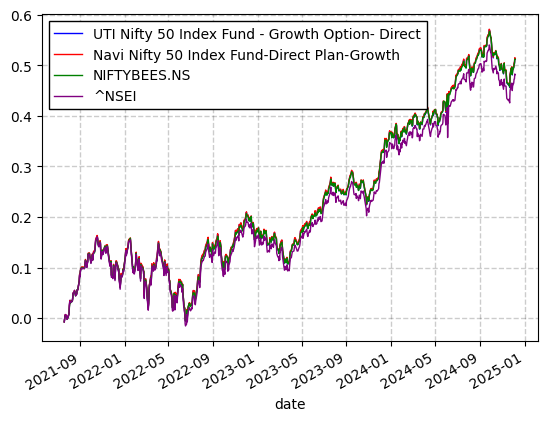

In [33]:
df.cumsum().plot()

In [35]:
qt.backtest.perf_summary_table(df.drop(columns=["^NSEI"]), bmk=df[["^NSEI"]])

In [36]:
qt.backtest.perf_summary_table(df[["^NSEI"]])

<Axes: >

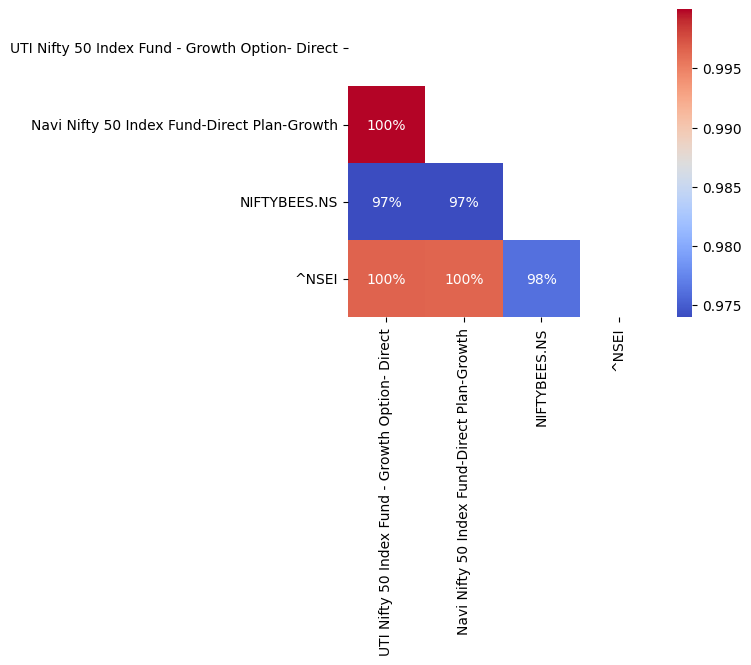

In [48]:
plt.figure(figsize=(5, 4))
qt.plot.corr(df)

<Axes: title={'center': 'Rolling 1-year volatility'}, xlabel='date'>

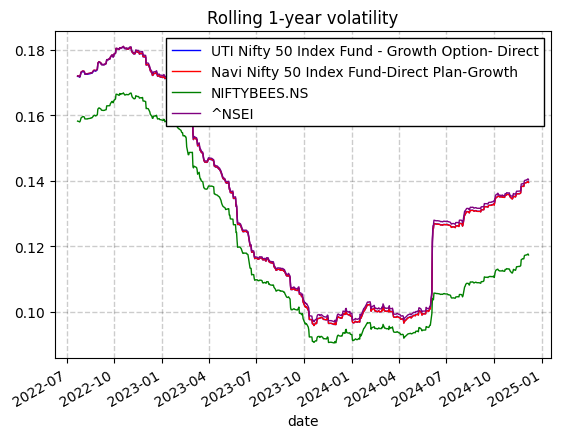

In [54]:
df.rolling(252).std().mul(252**0.5).plot(title="Rolling 1-year volatility")